In [1]:
using PyPlot
using PyCall
using LaTeXStrings

rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 14
rcParams["mathtext.fontset"] = "cm"
rcParams["mathtext.rm"] = "serif"
rcParams["text.usetex"] = "false"

using PhysicalConstants.CODATA2018
using Unitful
using Statistics




In [28]:
include("get_mathi_traj.jl")

# parametry pasti
Vrf = 500  # napeti radialnich elektrod [V]
Udc = 1300  # napeti axialnich elektrod [V]
Ω = 2*pi * 30e6 # budici frekvence pasti [Hz]

T = 0.5e-3 # teplota iontu
E_ext = [0,1,0]
delta_phi = [0,2e-4,0] # fazovy rozdil protejsich radialnich elektrod [x, y, 0]
phi = [0,0,0]

# casovy rozsah
tspan = range(0, 2*pi/Ω * 3, length=601)  # drive freq.
#tspan = range(0, 2*6.145235e-7, length=601)   # sekularni freq. pozor, kvuli tomuto radku muzou byt grafy 'zubate'
# analyticke reseni
(u_sec, u_IMM, u_EMM,u_EMM_phase, Per_sec) = get_mathi_traj(Vrf, Udc, Ω, T, E_ext,
    delta_phi, phi, tspan, div=true, sym_type=false)

u = u_sec + u_IMM + u_EMM + u_EMM_phase # celkovy pohyb iontu

(E_kin_sec, T_kin_sec) = get_E_kin_1D(u_sec[:,2])
(E_kin_IMM, T_kin_IMM) = get_E_kin_1D(u_IMM[:,2])
(E_kin_EMM, T_kin_EMM) = get_E_kin_1D(u_EMM[:,2])
(E_kin_EMM_phase, T_kin_EMM_phase) = get_E_kin_1D(u_EMM_phase[:,2]);

#mean(T_kin_sec) * 1/2 * convert(Float32,BoltzmannConstant/(1u"J*K^-1")/ convert(Float32, ElementaryCharge/(1u"C"))) * 1e6
mean(T_kin_sec)




0.00028259360191298667

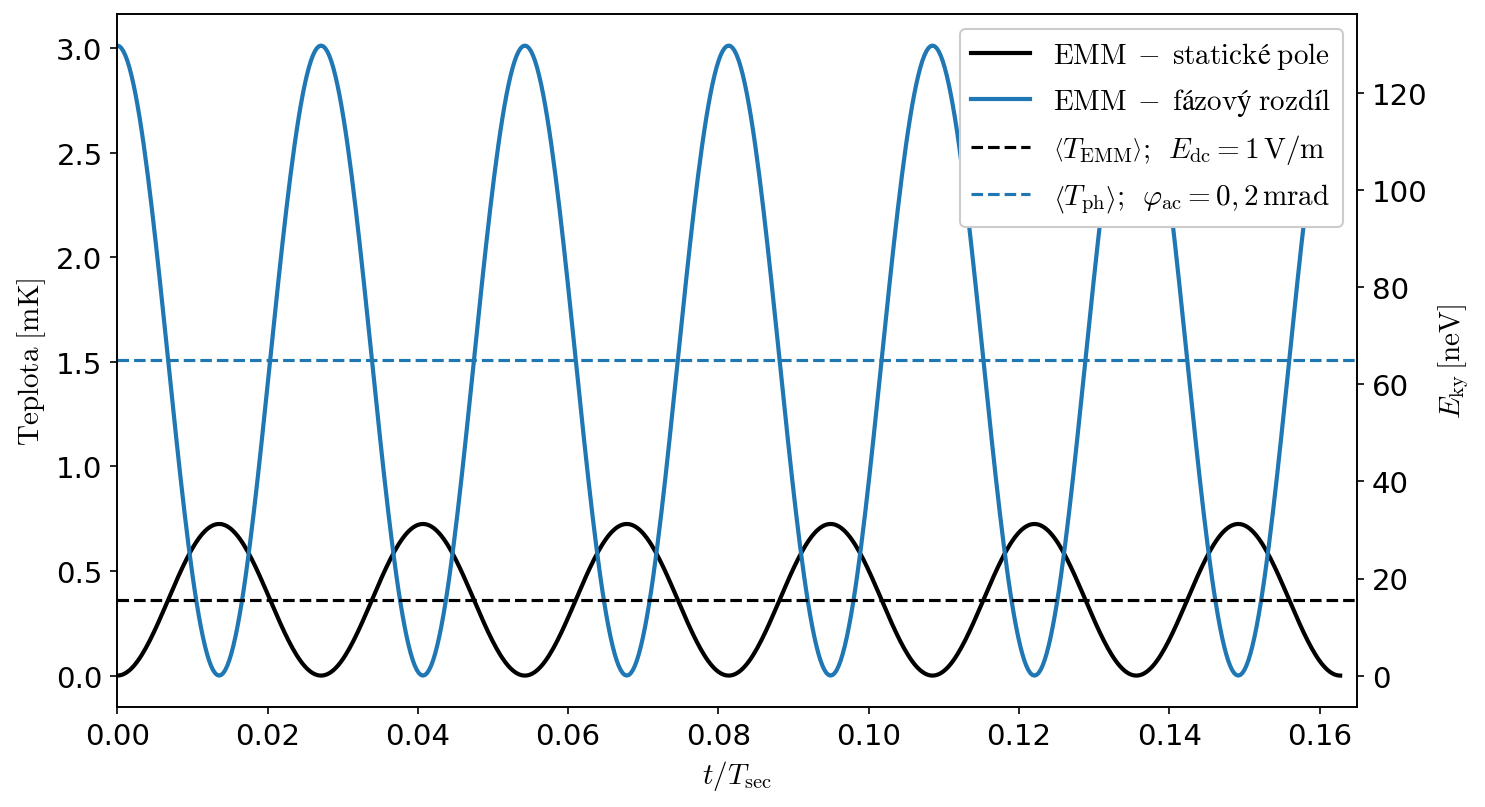

1-element Array{Tuple{Int64,Float64},1}:
 (0, 0.165)

In [29]:
my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

yscale = 1/2 * convert(Float32,BoltzmannConstant/(1u"J*K^-1")/ convert(Float32, ElementaryCharge/(1u"C"))) * 1e6 # skalovani
# druhe osy do neV

figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

plot(tspan/Per_sec[2], T_kin_EMM * 1e3, linewidth=2.0, label=L"\mathrm{EMM\; - \;statické\; pole}", color="black")
plot(tspan/Per_sec[2], T_kin_EMM_phase * 1e3, linewidth=2.0, label=L"\mathrm{EMM\; - \;fázový\; rozdíl}")
axhline(mean(T_kin_EMM)*1e3, linestyle="--", label=L"$ \left< T_{\rm{EMM}} \right>;\,\,\, E_{\rm{dc}} = 1 \, \rm{V/m} $", color="black")
axhline(mean(T_kin_EMM_phase)*1e3, linestyle="--", label=L"$ \left< T_{\rm{ph}} \right>;\,\,\, \varphi_{\rm{ac}} = 0,2 \, \rm{mrad}  $")
legend(loc=1, framealpha=1)
xlabel(L"$ t/T_{\rm{sec}} $")
ylabel(L" \rm{Teplota \,\,[mK]}")
x=gca()
x2 = x.twinx()
x2.set_ylabel(L"E_{\rm{k}y} \, \rm{[neV]}")
x2.set(ylim=(x.get_ylim()[1]* yscale, x.get_ylim()[2] * yscale ) )
x.set(xlim=(0, 0.165))
#savefig("/home/dan/diplomka_winfiles/Julia_vypocty_diplomka/ion_temperature_plots/temp_vs_t_EMM_EMMphase.svg", bbox_inches="tight")

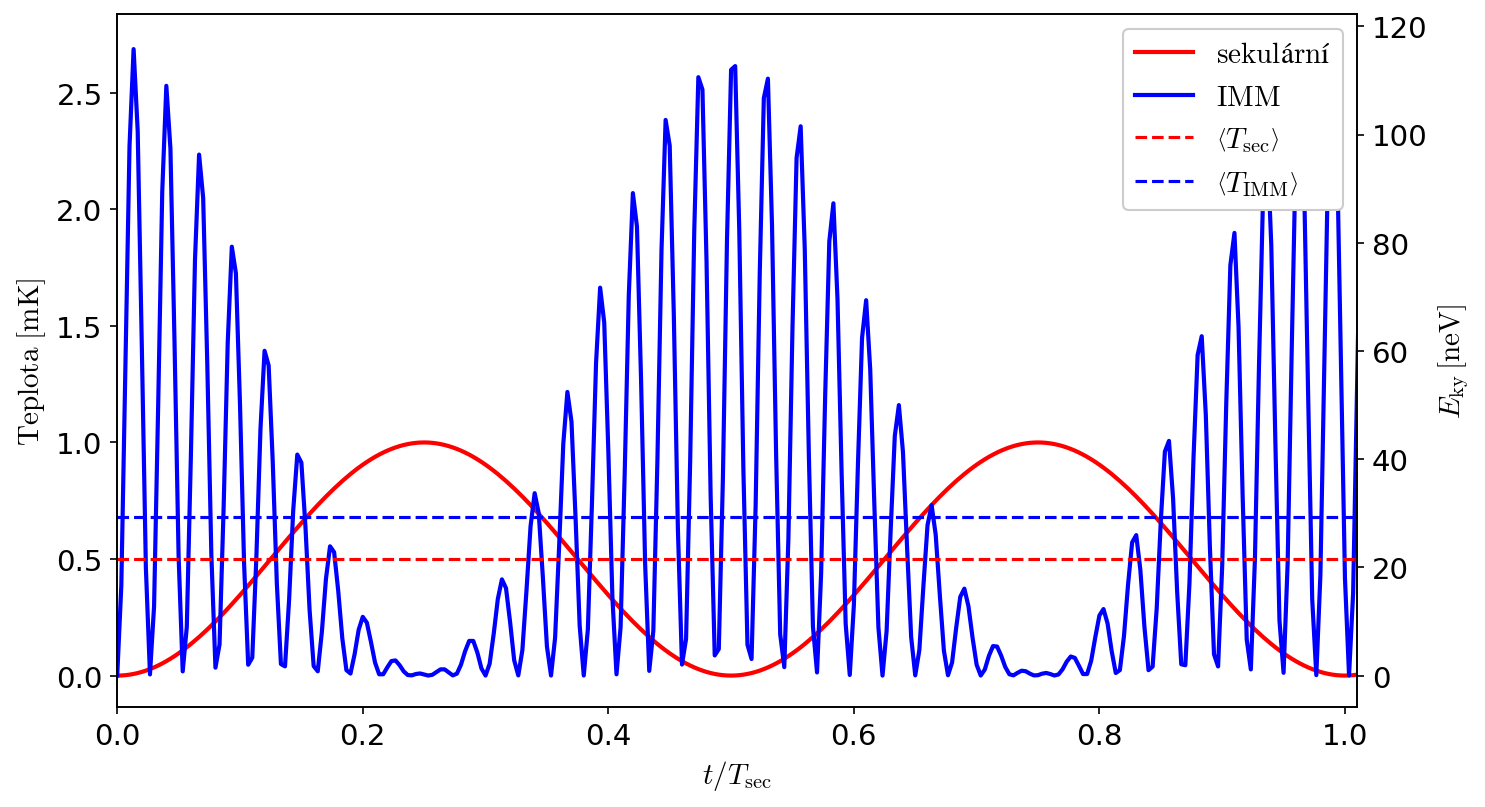

1-element Array{Tuple{Int64,Float64},1}:
 (0, 1.01)

In [27]:
my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

yscale = 1/2 * convert(Float32,BoltzmannConstant/(1u"J*K^-1")/ convert(Float32, ElementaryCharge/(1u"C"))) * 1e6 # skalovani
# druhe osy do neV

figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

plot(tspan/Per_sec[2], T_kin_sec * 1e3, linewidth=2.0, label=L"\mathrm{sekulární}", color="red")
plot(tspan/Per_sec[2], T_kin_IMM * 1e3, linewidth=2.0, label=L"\mathrm{IMM}", color="blue")
axhline(mean(T_kin_sec)*1e3, linestyle="--", label=L"$ \left< T_{\rm{sec}} \right>$", color="red")
axhline(mean(T_kin_IMM)*1e3, linestyle="--", label=L"$ \left< T_{\rm{IMM}} \right>$", color="blue")
legend(loc=1, framealpha=1)
xlabel(L"$ t/T_{\rm{sec}} $")
ylabel(L" \rm{Teplota \,\,[mK]}")
x=gca()
x2 = x.twinx()
x2.set_ylabel(L"E_{\rm{k}y} \, \rm{[neV]}")
x2.set(ylim=(x.get_ylim()[1]* yscale, x.get_ylim()[2] * yscale ) )
x.set(xlim=(0, 1.01))
#savefig("/home/dan/diplomka_winfiles/Julia_vypocty_diplomka/ion_temperature_plots/temp_vs_t_sec_IMM.svg", bbox_inches="tight")

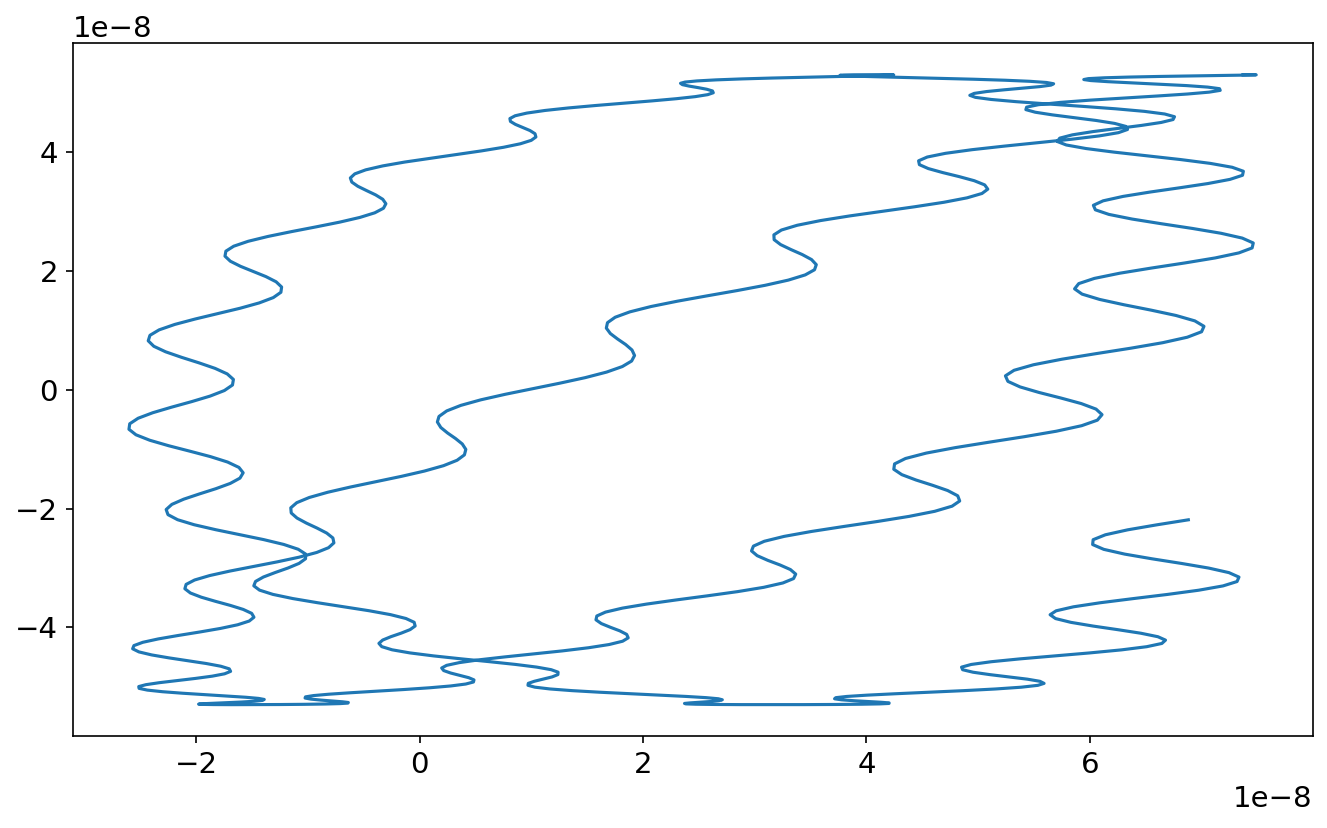

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8198eb1150>

In [18]:
my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz


figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)


#plot(tspan/Per_sec[2], u[:,5], linewidth=2.0, color="red")
#plot(tspan/Per_sec[2], u_sec[:,5], color="black" )
plot(u[:,5], u[:,6])

In [4]:
T_kin_EMM

601-element Array{Float64,1}:
 0.0                   
 0.00010281432908762448
 0.00035293165375015477
 0.0006084626204488024 
 0.0007244467642380365 
 0.0006350873027269981 
 0.00039107707074223405
 0.0001308409219794338 
 2.0085296937312816e-6 
 7.766537439287625e-5  
 0.0003148919949814404 
 0.0005791118207124017 
 0.0007204352735020329 
 ⋮                     
 0.000643022493758663  
 0.0007235928274139886 
 0.0005993039866020147 
 0.0003406639351301101 
 9.43968943295765e-5   
 2.079856439137444e-7  
 0.00011152974671107937
 0.0003652103237603088 
 0.0006173389615833264 
 0.0007248853064147525 
 0.000626839264834747  
 0.0003788214919722196 